In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [4]:
# Step 1: Understand the Data
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

In [5]:
# Step 2: Examine Data Quality
print("\nChecking for Missing Values:")
print("Customers Missing Values:\n", customers.isnull().sum())
print("Products Missing Values:\n", products.isnull().sum())
print("Transactions Missing Values:\n", transactions.isnull().sum())


Checking for Missing Values:
Customers Missing Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products Missing Values:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


<ipython-input-6-37b940d7c9b1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", palette="viridis")


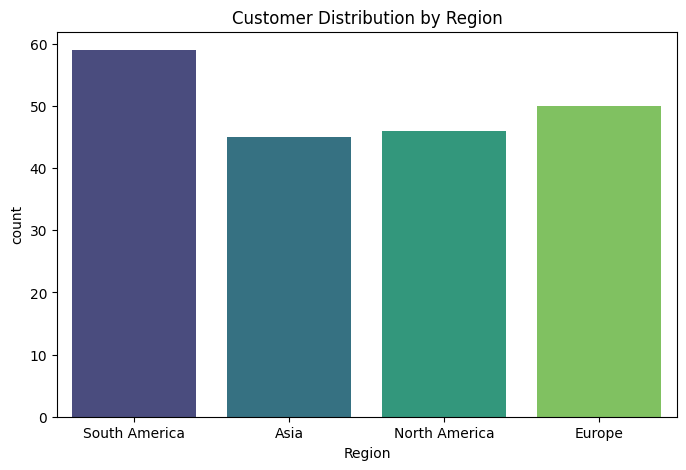

<ipython-input-6-37b940d7c9b1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x="Category", palette="muted")


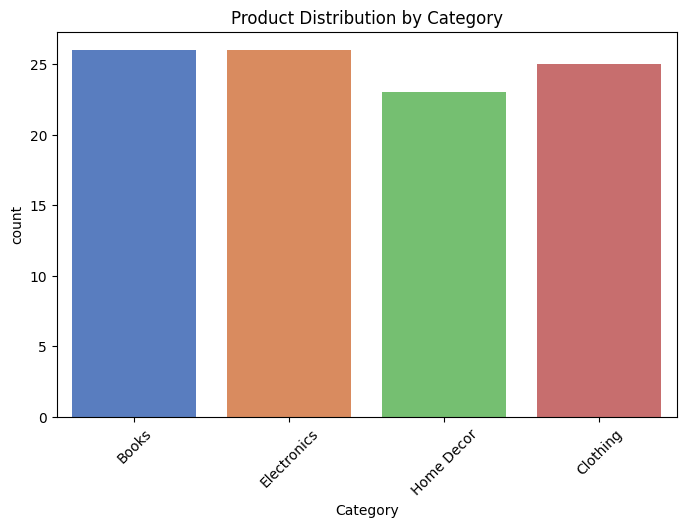

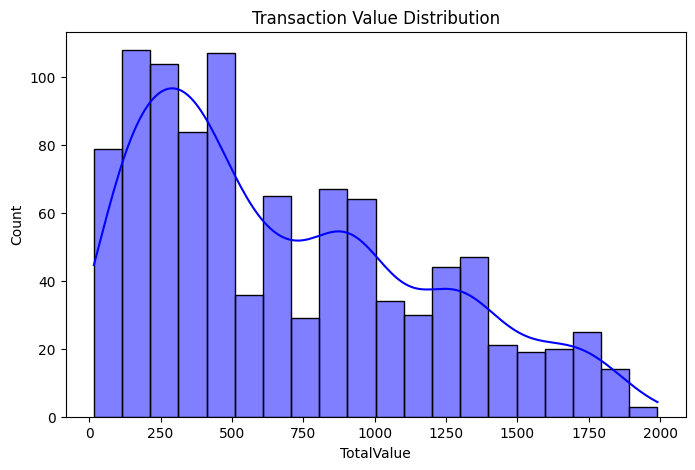

In [6]:
# Step 3: Univariate Analysis
# Customers by Region
plt.figure(figsize=(8, 5))
sns.countplot(data=customers, x="Region", palette="viridis")
plt.title("Customer Distribution by Region")
plt.show()

# Product Categories
plt.figure(figsize=(8, 5))
sns.countplot(data=products, x="Category", palette="muted")
plt.title("Product Distribution by Category")
plt.xticks(rotation=45)
plt.show()

# Transaction Amounts
plt.figure(figsize=(8, 5))
sns.histplot(transactions["TotalValue"], bins=20, kde=True, color="blue")
plt.title("Transaction Value Distribution")
plt.show()

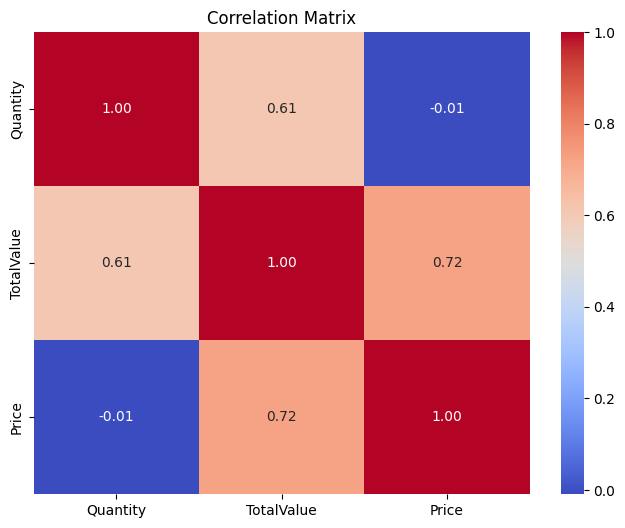

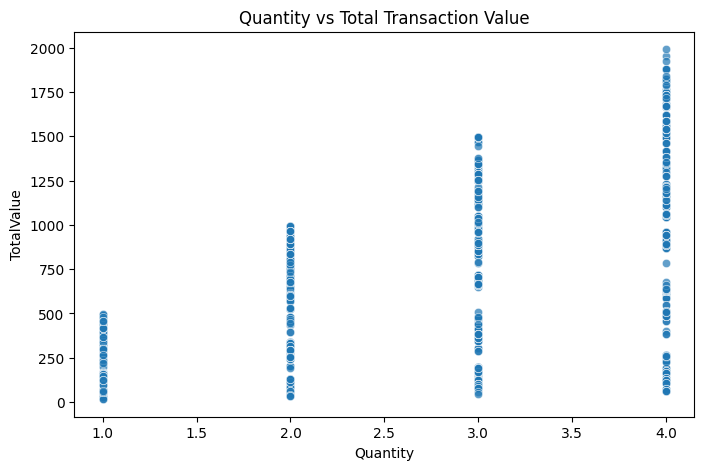

In [8]:
# Step 4: Bivariate Analysis
# Select only numerical columns for correlation
numeric_columns = transactions.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# TotalValue vs Quantity
plt.figure(figsize=(8, 5))
sns.scatterplot(data=transactions, x="Quantity", y="TotalValue", alpha=0.7)
plt.title("Quantity vs Total Transaction Value")
plt.show()

<ipython-input-9-d0c0c56d124e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x="Region", y="TotalValue", palette="mako")


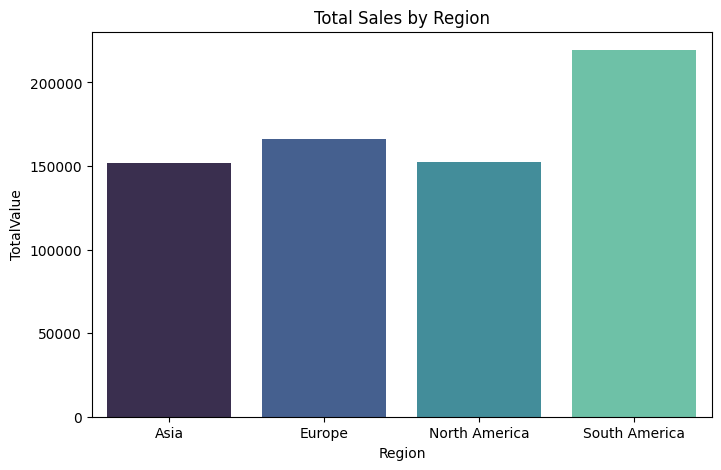

<ipython-input-9-d0c0c56d124e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="Category", y="TotalValue", palette="rocket")


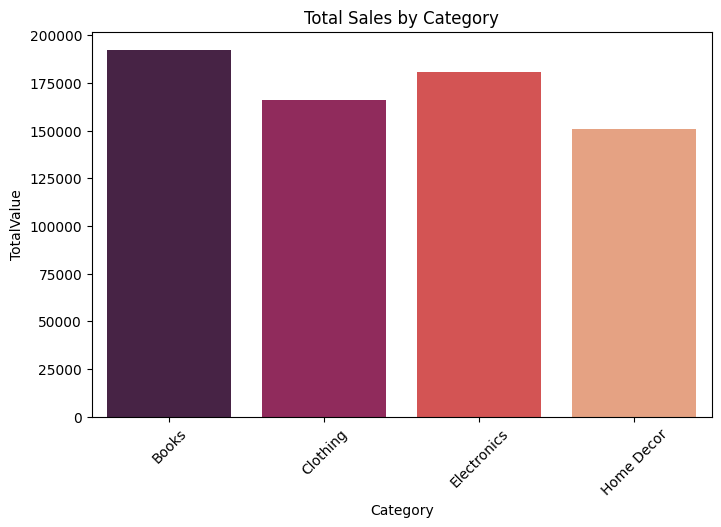

In [9]:
# Step 5: Multivariate Analysis
# Merging Datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Region-wise Sales Analysis
region_sales = merged_data.groupby("Region")["TotalValue"].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=region_sales, x="Region", y="TotalValue", palette="mako")
plt.title("Total Sales by Region")
plt.show()

# Category-wise Sales Analysis
category_sales = merged_data.groupby("Category")["TotalValue"].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x="Category", y="TotalValue", palette="rocket")
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()